In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adp-kr-p1/problem3_covid2.csv
/kaggle/input/adp-kr-p1/problem2.csv
/kaggle/input/adp-kr-p1/problem1.csv
/kaggle/input/adp-kr-p1/problem4.png


# 1번
온,습도,조도,CO2농도에 따른 객실의 사용유무 판별     
종속변수 Occupancy, 0: 비어있음 , 1: 사용중    

데이터 경로 : /kaggle/input/adp-kr-p1/problem1.csv

### 1 - (1)
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [32]:
df = pd.read_csv('/kaggle/input/adp-kr-p1/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB


In [34]:
display(df.isnull().sum())
print('\n', df[df.CO2.isnull()].date.values)
print('\n 결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.')

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64


 ['2015-02-03 19:09:59' '2015-02-03 19:31:00' '2015-02-04 18:08:00'
 '2015-02-05 06:08:00' '2015-02-05 16:09:59' '2015-02-08 08:06:00'
 '2015-02-08 11:54:00' '2015-02-08 20:58:59' '2015-02-09 06:04:59'
 '2015-02-09 07:31:00' '2015-02-09 07:49:00' '2015-02-10 07:53:59'
 '2015-02-12 00:34:00' '2015-02-12 10:53:00' '2015-02-12 15:04:00'
 '2015-02-12 20:38:00' '2015-02-13 22:53:59' '2015-02-15 16:41:59'
 '2015-02-16 00:53:59' '2015-02-17 01:56:00' '2015-02-18 06:20:00']

 결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.


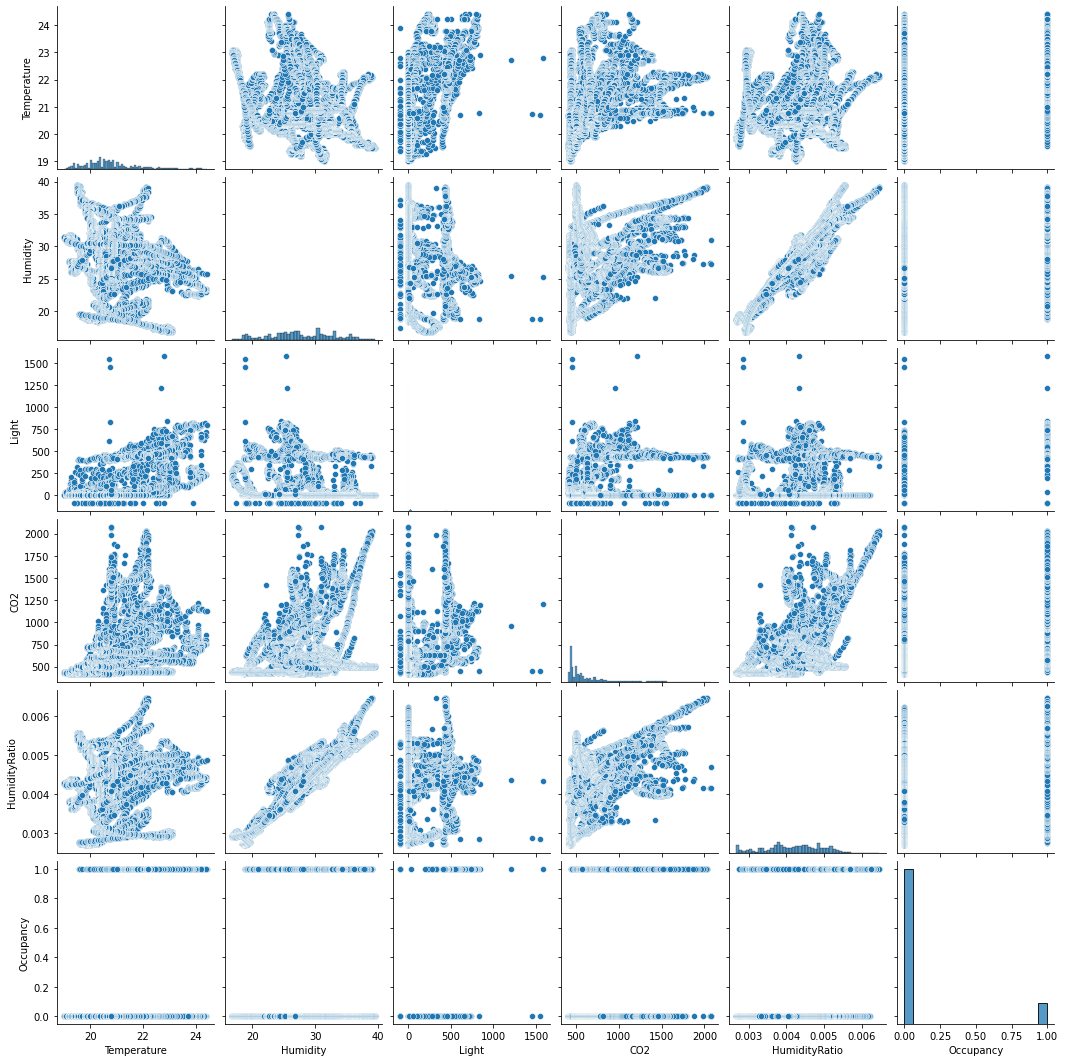

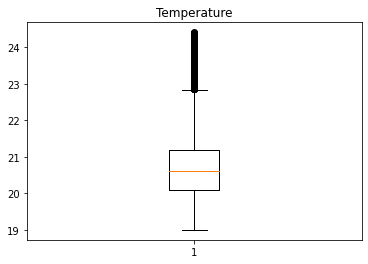

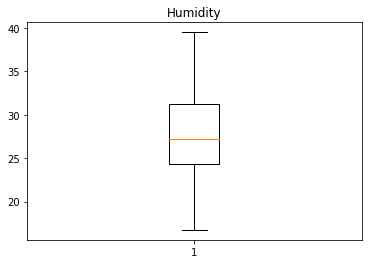

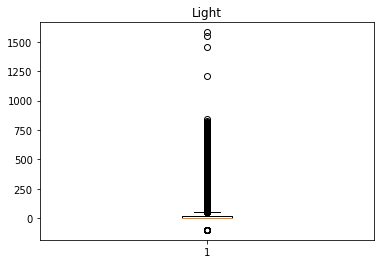

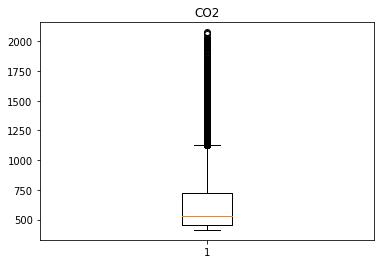

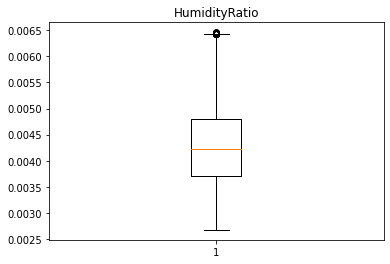

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

for v in df.select_dtypes(include = 'float'):
    target = df[v].dropna()
    plt.boxplot(target)
    plt.title(v)
    plt.show()
    
    

Humidity, HumidityRatio 컬럼은 높은 상관관계를 보이며, 두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다.

In [36]:
display(df[df.Light < 0].shape)
display(df.describe())

(50, 7)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000


Light 컬럼의 경우 -99인 값이 50개 존재한다.

In [37]:
df['date'] = pd.to_datetime(df['date'])
timedeltas = df['date'].diff().dt.seconds.dropna()
display(timedeltas.describe())

count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64

75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다. 연속된 데이터 간의 최대 시간차이는 약 25680초로 대략 7시간 차이가 존재한다. 시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다. 

### 1 - (2)
결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

CO2 컬럼에 nan값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy 값이 변화하지 않거나, date 값이 3분 이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체한다. 위의 두 기준에 해당한다면 모든 CO2 결측치를 대체할 수 있고 데이터의 품질을 손상시키지 않는다고 판단할 수 있다. 

In [38]:
for value in df[df.CO2.isnull()].index:
    target = df.iloc[value-1:value+2]
    difftime = target['date'].diff().dt.seconds.dropna()
    
    if target.Occupancy.nunique() == 1 and len(difftime[difftime > 180]) == 0:
        df.loc[value, 'CO2'] = df.loc[value-1].CO2
        
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### 1 - (3)
추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

In [39]:
df.loc[df.Light == -99, "Light"] = 0

Light 컬럼의 -99는 예외값에 대해 임의 값을 입력한 것으로 보인다. -99를 제외한 컬럼의 최솟값인 0으로 대체한다. 평균적으로 시간은 1분 간격의 데이터이다. 하지만 최대 7시간의 공백이 존재한다. 이를 보간해주는 것도 방법일 수 있지만, 시계열 모델을 사용하지 않을 것이기 때문에 보간을 따로 해주지 않고 모델링을 진행한다.

### 2 - (1)
데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성


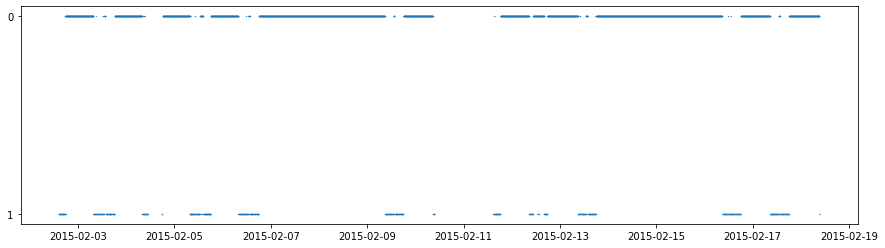

0    15810
1     2100
Name: Occupancy, dtype: int64

In [40]:
plt.figure(figsize = (15,4))
plt.scatter(df['date'], df['Occupancy'].astype('str'), s = 0.03)
plt.show()
df.Occupancy.value_counts()

Occupancy의 경우 7:1의 비율로 데이터 불균형이 존재한다. 위의 그래프에서 보면 2월 7일 ~9일, 2월 14일 ~ 16일 까지는 객실이 비어있다. 이처럼 객실이 비어있지 않은 경우보다 비어있는 경우가 더 많기에 불균형이 존재한다.

### 2 - (2)
오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

1. 랜덤오버샘플링
: 소수 클래스 데이터 중 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식
- 장점 : 데이터 불균형 문제 해결
- 단점 : 종속변수에 대한 고려없이 중복 생성, overfitting의 가능성 존재

2. SMOTE
: 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
- 장점 : 데이터 불균형 문제 해결, 데이터 분포를 고려한 중복없는 데이터 생성
- 단점 : 고차원 데이터에는 문제 발생 가능

### 2 - (3)
오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


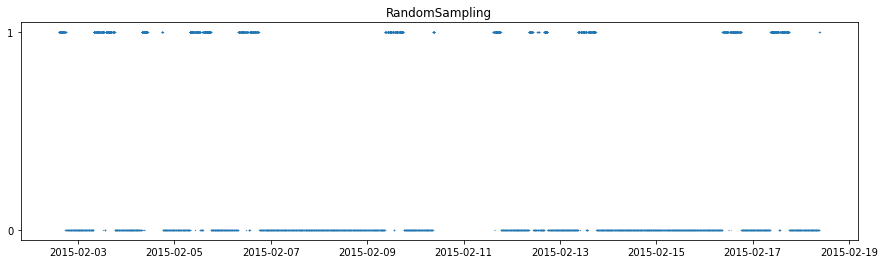

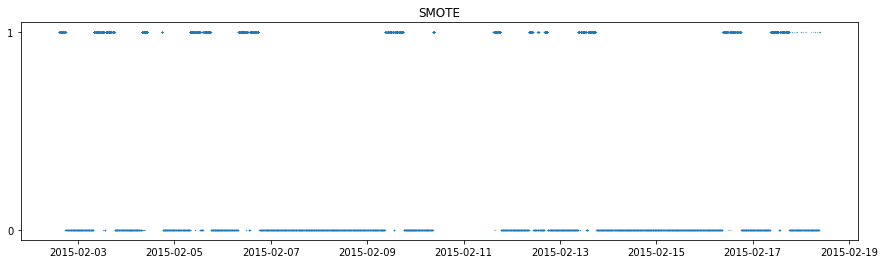

In [43]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler

# train 데이터에 대해서만 오버샘플링 진행
X = df.drop(columns = 'Occupancy')
y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=43, test_size=0.35)

# datetime 형태로는 샘플링 할 수 없어 timestamps 형식으로 변환
X_train.loc[:,'datetime'] = X_train['date'].view('int') // 10**9
X_test.loc[:, 'datetime'] = X_test['date'].view('int') // 10**9

X_imb = X_train.drop(columns=['date']).reset_index(drop=True).copy()
y_imb = y_train.reset_index(drop=True).copy()

X_samp, y_samp = RandomOverSampler(random_state=2022).fit_resample(X_imb, y_imb)
total = pd.concat([X_samp, y_samp], axis=1)
total['date'] = pd.to_datetime(total['datetime'], unit='s')

SMOTE_X_samp, SMOTE_y_samp = SMOTE(random_state=2022).fit_resample(X_imb, y_imb)
SMOTE_total = pd.concat([SMOTE_X_samp, SMOTE_y_samp], axis=1)
SMOTE_total['date'] = pd.to_datetime(SMOTE_total['datetime'], unit='s')

plt.figure(figsize=(15,4))
plt.title('RandomSampling')
plt.scatter(total['date'], total['Occupancy'].astype('str'), s=0.03)
plt.show()

plt.figure(figsize=(15,4))
plt.title('SMOTE')
plt.scatter(SMOTE_total['date'], SMOTE_total['Occupancy'].astype('str'), s=0.03)
plt.show()

### 3 - (1)
속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술

속도 측면에서는 logistic Regression,
정확도 측면에서는 randomforest classifier를 선택하여 분석을 진행함

### 3 - (2)
위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [49]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# 불필요 컬럼 제거 및 스케일링
if 'date' in X_train.columns:
    X_train = X_train.drop(columns=['date'])
    
if 'date' in X_test.columns:
    X_test = X_test.drop(columns=['date'])
    
result_auc_train = []
result_auc_test = []
result_time = []

for train_X, train_y in [(X_train, y_train), (X_samp, y_samp), (SMOTE_X_samp, SMOTE_y_samp)]:
    trainX = train_X.copy()
    testX = X_test.copy()
    
    sc = MinMaxScaler()
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)
    
    lrstart = time.time()
    lr = LogisticRegression()
    lr.fit(trainX, train_y)
    lrend = time.time() - lrstart
    
    pred_lr = lr.predict(testX)
    auc_lr_train = roc_auc_score(train_y, lr.predict(trainX))
    auc_lr = roc_auc_score(y_test, pred_lr)
    
    rfstart = time.time()
    rf = RandomForestClassifier()
    rf.fit(trainX, train_y)
    rfend = time.time() - rfstart
    
    pred_rf = rf.predict(testX)
    auc_rf_train = roc_auc_score(train_y, rf.predict(trainX))
    auc_rf = roc_auc_score(y_test, pred_rf)
    
    result_auc_test.append([auc_lr, auc_rf])
    result_time.append([lrend, rfend])
    result_auc_train.append([auc_lr_train, auc_rf_train])

In [51]:
# logistic regression과 randomforest 분류기를 샘플링방식에 따른 학습시 정확도와 모델 학습시간에 대해 평가했다.

print('훈련셋 모델 auc 결과')
result_auc_trains = pd.DataFrame(result_auc_train)
result_auc_trains.index = ['raw', 'RamdomSampling', 'SMOTE']
result_auc_trains.columns = ['Logistic', 'RandomForest']
display(result_auc_trains)

print('테스트셋 모델 auc 결과')
result_auc_tests = pd.DataFrame(result_auc_test)
result_auc_tests.index = ['raw', 'RandomSampling', 'SMOTE']
result_auc_tests.columns = ['Logistic', 'RandomForest']
display(result_auc_tests)

print('모델 학습 시간')
result_times = pd.DataFrame(result_time)
result_times.index = ['raw', 'RandomSampling', 'SMOTE']
result_times.columns = ['Logistic', 'RandomForest']
result_times

훈련셋 모델 auc 결과


,Logistic,RandomForest
raw,0.987030,1.0
RamdomSampling,0.989879,1.0
SMOTE,0.991096,1.0


테스트셋 모델 auc 결과


,Logistic,RandomForest
raw,0.988823,0.986267
RandomSampling,0.987016,0.989217
SMOTE,0.987107,0.990806


모델 학습 시간


,Logistic,RandomForest
raw,0.036457,1.094207
RandomSampling,0.068231,1.991244
SMOTE,0.065002,2.642572


### 3 - (3)
위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라

Logistic Regression의 경우 학습시간은 RandomForest에 비해 낮게 나왔지만 성능의 경우 train셋의 경우 모두 낮게 나왔으며 test 셋의 경우 업샘플링을 하지 않은 경우를 제외하고는 모두 성능이 낮게 나왔다. RandomForest의 경우 학습 모델은 auc값이 1로 오버피팅 됐다. test 셋에 대해서는 raw, RandomSampling, SMOTE 순서로 auc값이 증가하는 것을 확인할 수 있다.

# 2번
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오    
데이터 경로 : /kaggle/input/adp-kr-p1/problem2.csv

### 1
귀무가설, 연구가설 세우기

- 귀무가설 : 진공관 수명의 중위수는 1만 시간이다.
- 대립가설 : 진공관 수명의 중위수는 1만 시간이 아니다.

### 2
유효한 데이터의 개수는?

In [52]:
df2 = pd.read_csv('/kaggle/input/adp-kr-p1/problem2.csv')

print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다.')
print(df2[df2['life span'] == 10000].shape[0])

df_filter = df2[df2['life span'] != 10000]

중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다.
4


### 3
검정통계량 및 연구가설 채택 여부를 작성하라

In [53]:
from scipy.stats import wilcoxon 

s, p = wilcoxon(df_filter['life span'] - 10000)
print('검정 통계량 : ',s)
print('p-value : ', p)

검정 통계량 :  8.5
p-value :  0.1953125


p-value는 0.195로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 따라서 진공관 수명의 중위수는 10000시간이라고 판단할 수 있다.

# 3번
코로나 시계열 데이터     
데이터 출처(후처리과정 미포함) :https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv    
     
데이터 경로 : /kaggle/input/adp-kr-p1/problem3_covid2.csv

### 1 
데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [122]:
df = pd.read_csv('/kaggle/input/adp-kr-p1/problem3_covid2.csv')

target = df.groupby(['location','date']).sum().groupby(level=0).cumsum()
target.columns = ['cumulative sum']
target = target.reset_index()
target

,location,date,cumulative sum
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
...,...,...,...
11890,Vanuatu,2021-10-28,5.0
11891,Vanuatu,2021-10-29,5.0
11892,Vanuatu,2021-10-30,5.0
11893,Vanuatu,2021-10-31,5.0


## 2
1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라)  국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라

In [125]:
from scipy.spatial import distance
import statsmodels.api as sm

name =[]
for lo in target.location.unique():
    
    v = sm.tsa.stattools.acf(target[target.location==lo]['cumulative sum'], nlags=50, fft=False)
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)

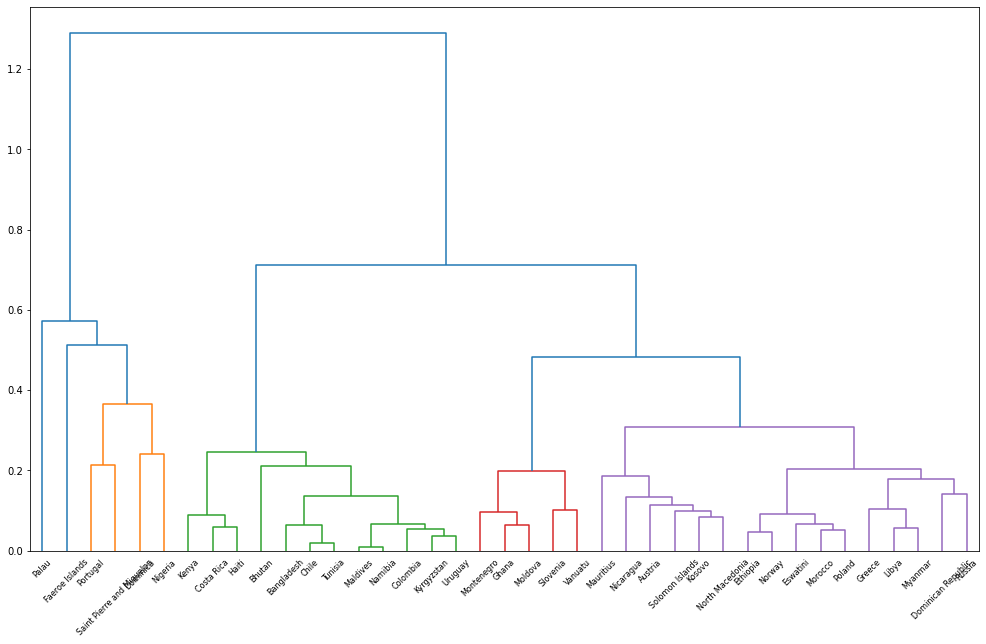

In [126]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


data =v.set_index(0)
label = np.array(data.index)

datav = data.values

fig = plt.figure(figsize=(17,10))

ax3 = fig.add_subplot(1,1,1)
dend3 = sch.linkage(datav, method='average', metric='euclidean')
cutoff = 0.3*max(dend3[:,2])
dend_res3 = sch.dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()

# 4번
아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라    
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p1/problem4.png?raw=true)


### 1번
귀무가설, 연구가설 세우기

- 귀무가설 : 학과와 성적은 관련이 없다 (독립이다)
- 연구가설 : 학과와 성적은 관련이 있다 (독립이 아니다)

### 2번
학과와 성적이 독립일 경우의 기댓값을 구하시오

In [127]:
df = pd.DataFrame({'사회과학' : [15,60,24],
                  '자연과학' : [25,69,5],
                  '공학' : [10,77,13]},
                 index = ['1.5-2.5', '2.5-3.5', '3.5-4.5'])
df

,사회과학,자연과학,공학
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,5,13


In [128]:
from scipy.stats import chi2_contingency, fisher_exact

chi2, p, dof, expected = chi2_contingency(df)
print(expected)

[[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]


### 3번
검정통계량 구하고 연구가설의 채택여부 작성

In [129]:
print('검정통계량 : ', chi2)
print('p-value : ', p)

검정통계량 :  22.136920195949322
p-value :  0.00018822647762421383


p-value값이 0.05보다 작기 때문에 귀무가설을 기각한다. 따라서 학과와 성적은 독립이라고 할 수 없다.